In [1]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@sample.net', 'david@website.org', 'eve@domain.com'],
    'description': ['Alice is a Data Scientist.', 'Bob is an Engineer.', 'Charlie is a Doctor.', 'David is a Lawyer.', 'Eve is an Artist.']
}
df = pd.DataFrame(data)
print(df)

      name               email                 description
0    Alice   alice@example.com  Alice is a Data Scientist.
1      Bob     bob@example.com         Bob is an Engineer.
2  Charlie  charlie@sample.net        Charlie is a Doctor.
3    David   david@website.org          David is a Lawyer.
4      Eve      eve@domain.com           Eve is an Artist.


In [6]:
## cat 데이터 붙이기
df['name+email']=df['name'].str.cat(df['email'],sep='/')

In [10]:
## 데이터 나누기
df[['userid','domain']]=df['email'].str.split('@',expand=True)

In [18]:
## get으로 문자의 특정 위치값을 가지고 올 수 있다.
df['name'].str.get(0)

0    A
1    B
2    C
3    D
4    E
Name: name, dtype: object

In [23]:
## 슬라이스
df['name'].str.slice(start=0, stop=2)

0    Al
1    Bo
2    Ch
3    Da
4    Ev
Name: name, dtype: object

In [25]:
## extract, 정규표현식 추출
df['email'].str.extract(r'@(\w+\.\w+)')

,0
0,example.com
1,example.com
2,sample.net
3,website.org
4,domain.com


In [26]:
df

,name,email,description,name+email,userid,domain
0,Alice,alice@example.com,Alice is a Data Scientist.,Alice/alice@example.com,alice,example.com
1,Bob,bob@example.com,Bob is an Engineer.,Bob/bob@example.com,bob,example.com
2,Charlie,charlie@sample.net,Charlie is a Doctor.,Charlie/charlie@sample.net,charlie,sample.net
3,David,david@website.org,David is a Lawyer.,David/david@website.org,david,website.org
4,Eve,eve@domain.com,Eve is an Artist.,Eve/eve@domain.com,eve,domain.com


In [27]:
# 정규표현식에 일치하는 모든 부분 추출 extractall
df['description'].str.extractall(r'(\w+)')

0
  match           
0 0          Alice
  1             is
  2              a
  3           Data
  4      Scientist
1 0            Bob
  1             is
  2             an
  3       Engineer
2 0        Charlie
  1             is
  2              a
  3         Doctor
3 0          David
  1             is
  2              a
  3         Lawyer
4 0            Eve
  1             is
  2             an
  3         Artist

In [29]:
# replace
df['description'].str.replace('is','')

0    Alice  a Data Scientt.
1         Bob  an Engineer.
2        Charlie  a Doctor.
3          David  a Lawyer.
4             Eve  an Artt.
Name: description, dtype: object

In [31]:
# find
df['description'].str.find('Artist')

0    -1
1    -1
2    -1
3    -1
4    10
Name: description, dtype: int64

In [33]:
#문자열이 포함되어 있는지
#contains
df['description'].str.contains('Artist')

0    False
1    False
2    False
3    False
4     True
Name: description, dtype: bool

In [34]:
#loc 이랑 응용하면 
#& 문으로 다양하게 엮을 수 있다.
df.loc[df['description'].str.contains('Artist')]

,name,email,description,name+email,userid,domain
4,Eve,eve@domain.com,Eve is an Artist.,Eve/eve@domain.com,eve,domain.com


In [36]:
## get_dummies
## 인코딩하는 작업으로
df['domain'].str.get_dummies()

,domain.com,example.com,sample.net,website.org
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [38]:
df

,name,email,description,name+email,userid,domain
0,Alice,alice@example.com,Alice is a Data Scientist.,Alice/alice@example.com,alice,example.com
1,Bob,bob@example.com,Bob is an Engineer.,Bob/bob@example.com,bob,example.com
2,Charlie,charlie@sample.net,Charlie is a Doctor.,Charlie/charlie@sample.net,charlie,sample.net
3,David,david@website.org,David is a Lawyer.,David/david@website.org,david,website.org
4,Eve,eve@domain.com,Eve is an Artist.,Eve/eve@domain.com,eve,domain.com


In [39]:
df[['domain','userid']].str.get_dummies()

AttributeError: 'DataFrame' object has no attribute 'str'

In [40]:
df[['description','userid']].str.contains('Artist')

AttributeError: 'DataFrame' object has no attribute 'str'

In [42]:
df['description'].str.contains('Artist')

0    False
1    False
2    False
3    False
4     True
Name: description, dtype: bool

In [41]:
df['description']

0    Alice is a Data Scientist.
1           Bob is an Engineer.
2          Charlie is a Doctor.
3            David is a Lawyer.
4             Eve is an Artist.
Name: description, dtype: object

- 시리즈로 접근해서 처리한 후 -> 데이터프레임으로 같이 연결하면 된다.

In [45]:
df=pd.read_csv('movie_rv.csv')

In [46]:
df

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [48]:
# 구분자를 넣고 여러 컬럼을 나눠보기!
df['document'].str.split(' ',n=1, expand=True)

,0,1
0,아,더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고,초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다,None
3,교도소,이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...
...,...,...
149995,인간이,문제지.. 소는 뭔죄인가..
149996,평점이,너무 낮아서...
149997,이게,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘,영화의 최고봉.방황과 우울했던 날들의 자화상


In [51]:
# 데이터를 3개 이상 나누고 싶다.
df['document'].str.partition(sep=' ')

,0,1,2
0,아,,더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고,,초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다,,
3,교도소,,이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의,,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...
...,...,...,...
149995,인간이,,문제지.. 소는 뭔죄인가..
149996,평점이,,너무 낮아서...
149997,이게,,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘,,영화의 최고봉.방황과 우울했던 날들의 자화상


In [52]:
# 정규표현식으로 특정 단어 추출
df['document'].str.findall('[재미]')

0             []
1             []
2            [재]
3         [재, 미]
4             []
           ...  
149995        []
149996        []
149997        []
149998        []
149999        []
Name: document, Length: 150000, dtype: object

In [54]:
##리뷰에 대한 수치를 시각적으로 볼 수 있다.

df['document_len']=df['document'].str.len()

In [57]:
import matplotlib.pyplot as plt

(array([36766., 46098., 33551., 12015.,  6098.,  3990.,  3136.,  2231.,
         2361.,  3749.]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <BarContainer object of 10 artists>)

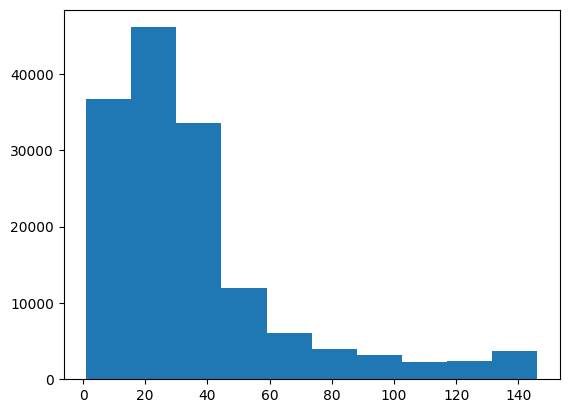

In [58]:
plt.hist(df['document_len'])

In [63]:
df.groupby('label')['document_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,75170.0,35.806319,30.343703,1.0,16.0,27.0,43.0,146.0
1,74825.0,34.599960,28.680707,1.0,16.0,27.0,42.0,146.0


In [64]:
df

,Unnamed: 0,id,document,label,document_len
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19.0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33.0
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,17.0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29.0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61.0
...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,19.0
149996,149996,8549745,평점이 너무 낮아서...,1,13.0
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,31.0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,27.0


### 정형데이터와는 다르게 비정형데이터( 리뷰데이터 ) 
- 어떤 점이 차이가 있을까?

In [66]:
import seaborn as sns 
sns.load_dataset('titanic').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [67]:
df.head()

,Unnamed: 0,id,document,label,document_len
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19.0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33.0
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,17.0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29.0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61.0


## 텍스트 전처리
- 영문, 한국어
- 영문부터 패키지가지고 학습할 예정
- 자연어처리 (NLP) 인간의 언어- > 컴퓨터가 이해할 수 있도록 처리를 해야 한다. 컴퓨터가 분석할 수 있도록 프로그래밍하는 방법!

In [68]:
import nltk

In [71]:
#nltk 라이브러리 
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/jun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to /Users/jun/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
'Deep learning is the kind you take with you through the rest of your life.'

'Deep learning is the kind you take with you through the rest of your life.'

- 전처리 단계 
- 텍스트에 대한 전처리 단계 
- 주어진 텍스트의 노이즈나 분석에 불필요한 것들이 분명 존재, 제거하고 문장들을 나눠서 분석할 수 있다. 표준 단어나 이런 것들로 분리하고, 품사나 파악하는 것 
- 한국어, 영어는 다르니깐 전처리 어느정도 다를 것

- 정제 : (정규표현식 등으로 데이터에 노이즈를 제거하거나, 필요한 것들만 추출하는 작업)
- 토큰화 : (주어진 텍스트를 원하는 단위로 나누는 것 (Token) 단어 토큰화, 다른 방법으로도 토큰을 나눌 수 있다. 딥러닝에서 성능을 올리기 위해 토큰화 작업 진행)
- 정규화 : (동사의 변형들, 과거형이나 등등 결국 하나의 동사에 의미), 어간 추출, 표제어 추출 등으로 작업할 수 있다.
- 품사 태깅 : (명사, 대명사, 형용사 등등) 앞서 토큰을 나눴으면 -> 의미를 부여할 수 있다. 품사를 알려주면서 더 많은 의미있는 데이터를 확보

In [82]:
df = 'Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.[2]'

In [83]:
df

'Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.[2]'

In [84]:
#문장에 대한 토큰화
from nltk.tokenize import sent_tokenize

print(sent_tokenize(df))

['Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning.', 'The adjective "deep" refers to the use of multiple layers in the network.', 'Methods used can be either supervised, semi-supervised or unsupervised.', '[2]']


In [89]:
#단어 토큰화
from nltk.tokenize import word_tokenize

print(word_tokenize(df))

['Deep', 'learning', 'is', 'the', 'subset', 'of', 'machine', 'learning', 'methods', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', '.', 'The', 'adjective', '``', 'deep', "''", 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', '.', 'Methods', 'used', 'can', 'be', 'either', 'supervised', ',', 'semi-supervised', 'or', 'unsupervised', '.', '[', '2', ']']


In [90]:
# 특수문자등을 처리할 수 있다.
# 제거해 주는 패키
from nltk.tokenize import WordPunctTokenizer
# 특수문자 제거
print(WordPunctTokenizer().tokenize(df))


['Deep', 'learning', 'is', 'the', 'subset', 'of', 'machine', 'learning', 'methods', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', '.', 'The', 'adjective', '"', 'deep', '"', 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', '.', 'Methods', 'used', 'can', 'be', 'either', 'supervised', ',', 'semi', '-', 'supervised', 'or', 'unsupervised', '.[', '2', ']']


In [92]:
# 정규표현식도 같이 토크나이즈
from nltk.tokenize import RegexpTokenizer

tk= RegexpTokenizer('[\w"]+')

In [95]:
#내가 원하는 정규표현식에 따라 데이터가 전처리가 진행이 되었다.
print(tk.tokenize(df))

['Deep', 'learning', 'is', 'the', 'subset', 'of', 'machine', 'learning', 'methods', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', 'The', 'adjective', '"deep"', 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', 'Methods', 'used', 'can', 'be', 'either', 'supervised', 'semi', 'supervised', 'or', 'unsupervised', '2']


In [100]:
#불용어 처리 (노이즈)
#은,는,이,가 의미가 없다고 보는 단어들
#영어도 불용어처리 진행
from nltk.corpus import stopwords #불용어 가져오는 패키지

en_stops=set(stopwords.words('english'))

In [101]:
## 다양한 패키지를 응용해서 전처리를 할 수 있다. (정제 가능)
en_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [105]:
tokens=tk.tokenize(df.lower())

In [108]:
print([word for word in tokens if word not in en_stops]) # 불용어처리는 제외한 단어만 전처리가 가능하다.

['deep', 'learning', 'subset', 'machine', 'learning', 'methods', 'based', 'artificial', 'neural', 'networks', 'representation', 'learning', 'adjective', '"deep"', 'refers', 'use', 'multiple', 'layers', 'network', 'methods', 'used', 'either', 'supervised', 'semi', 'supervised', 'unsupervised', '2']


In [109]:
df

'Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.[2]'

### 필수과제1
- 영화리뷰데이터 (한글)
- str 문법으로 전처리 진행해서 의미 있는 단어들만 추출하여 어떤 단어가 빈도가 가장 많은지 value_count, 시각화까지 진행 ( Top10 ~20개 정도 )
- 0, 1 label에 따라 어떤 단어의 빈도가 가장 많은지 그리고 둘의 차이가 있는지 확인해 주시면 됩니다.

- 필수는 : 코드와 주석처리 ( 시각화하는 코드, 전처리 코드 필수적으로 들어가야 한다! )